In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('C:/Users/SALMAN/Desktop/GRIP/BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-05,8912.832031,9062.415039,8856.827148,9003.070313,9003.070313,4.314846e+10
1,2020-05-06,9007.441406,9411.467773,8966.706055,9268.761719,9268.761719,4.937189e+10
2,2020-05-07,9261.895508,9992.664063,9138.322266,9951.518555,9951.518555,6.111270e+10
3,2020-05-08,9936.162109,9996.743164,9767.172852,9842.666016,9842.666016,5.178075e+10
4,2020-05-09,9840.906250,9913.863281,9580.644531,9593.896484,9593.896484,4.656612e+10
...,...,...,...,...,...,...,...
361,2021-05-01,57714.664063,58448.339844,57052.273438,57828.050781,57828.050781,4.283643e+10
362,2021-05-02,57825.863281,57902.593750,56141.906250,56631.078125,56631.078125,3.817741e+10
363,2021-05-03,56620.273438,58973.308594,56590.871094,57200.292969,57200.292969,5.171314e+10
364,2021-05-04,57214.179688,57214.179688,53191.425781,53333.539063,53333.539063,6.856471e+10


In [3]:
df.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [4]:
df=df.dropna()

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-6-182e23b44254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])


In [7]:
#df.set_index('Date')

In [8]:
#pip install chart_studio

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02
mean,24958.003177,25679.556038,24223.525689,25079.453908,25079.453908,4.182539e+10
std,18328.735178,18911.631792,17666.248775,18376.863577,18376.863577,2.638277e+10
min,8610.385742,8949.898438,8374.323242,8601.795898,8601.795898,1.225260e+10
25%,10348.881347,10578.026367,10184.119629,10366.351074,10366.351074,2.368586e+10
50%,14133.733398,15450.329102,14102.088867,14833.753906,14833.753906,3.650685e+10
75%,39021.767578,40513.457032,36853.599610,39226.669922,39226.669922,5.530828e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [11]:
print(f'dataset contains data from:-{df.Date.min()}  {df.Date.max()}')
print(f'total days = {df.Date.max()-df.Date.min()}')

dataset contains data from:-2020-05-05 00:00:00  2021-05-05 00:00:00
total days = 365 days 00:00:00


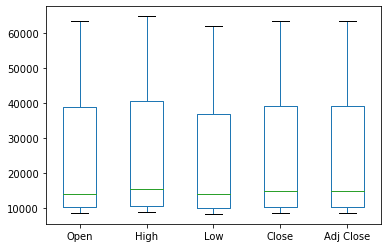

In [12]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [13]:
lyout=go.Layout(title='Stock Prices of Bitcoin',
                
                xaxis=dict(title='Date', titlefont=dict(size=18,color='#7f7f7f'))
                
                ,yaxis=dict(title='Price',titlefont=dict(size=18,color='#7f7f7f')))

bit_data=[{'x':df['Date'],'y':df['Close']}]
plot=go.Figure(data=bit_data,layout=lyout)

In [14]:
iplot(plot)

In [15]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [16]:
x=np.array(df.index).reshape(-1,1)
y=df["Close"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=104)

In [17]:
#feature scaling is impt step for training
scalar=StandardScaler().fit(x_train)

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
actual= go.Scatter(
                    x=x_train.T[0],
                    y=y_train,
                    mode='markers',
                    name='Actual')

pred= go.Scatter(
                x=x_train.T[0],
                 y=lr.predict(x_train).T,
                 mode='lines',
                 name='Predicted')

bit_data=[actual,pred]
go.layout.xaxis.title.text= 'Day'
plot2=go.Figure(data=bit_data,layout=lyout)

In [22]:
iplot(plot2)

In [25]:
score=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,lr.predict(x_train))}\t{r2_score(y_test,lr.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train,lr.predict(x_train))}\t{mse(y_test,lr.predict(x_test))}
'''

print(score)


Metric           Train                Test        
r2_score  0.8238374936558068	0.7974690305861977
MSE       60690195.184063405	64503749.90560496

